<a href="https://colab.research.google.com/github/triman1905/100-days-of-machine-learning/blob/main/log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
df=pd.read_csv(r"C:\Users\HP\Downloads\archive (2)\lending_club_info.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\HP\\Downloads\\archive (2)\\lending_club_info.csv'

In [4]:
pip install numpy pandas


In [2]:
import numpy as np
import pandas as pd

In [8]:
df=pd.read_csv(r"C:\Users\HP\Downloads\archive (2)\lending_club_loan_two.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\HP\\Downloads\\archive (2)\\lending_club_loan_two.csv'

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gabrielsantello/lending-club-loan-preprocessed-dataset")

print("Path to dataset files:", path)

100%|██████████| 27.5M/27.5M [00:01<00:00, 22.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gabrielsantello/lending-club-loan-preprocessed-dataset/versions/1


In [10]:
import os

path = "/root/.cache/kagglehub/datasets/gabrielsantello/lending-club-loan-preprocessed-dataset/versions/1"

os.listdir(path)

['lending_club_info.csv', 'lending_club_loan_two.csv']

In [11]:
import pandas as pd

path = "/root/.cache/kagglehub/datasets/gabrielsantello/lending-club-loan-preprocessed-dataset/versions/1"

df = pd.read_csv(path + "/lending_club_info.csv")

In [12]:
df.head()

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade


In [13]:
import os

os.listdir(path)

['lending_club_info.csv', 'lending_club_loan_two.csv']

In [4]:
import pandas as pd

df = pd.read_csv(path + "/lending_club_loan_two.csv")
df.head()

NameError: name 'path' is not defined

In [15]:
df.shape


(396030, 27)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [17]:
df["loan_status"].value_counts()

,count
loan_status,
Fully Paid,318357
Charged Off,77673


In [3]:
df["target"] = df["loan_status"].map({
    "Fully Paid": 0,
    "Charged Off": 1
})
df.drop("loan_status", axis=1, inplace=True)

NameError: name 'df' is not defined

In [1]:
df = pd.get_dummies(df, drop_first=True)

NameError: name 'pd' is not defined

In [3]:
import pandas as pd
import numpy as np

In [4]:
path = "/root/.cache/kagglehub/datasets/gabrielsantello/lending-club-loan-preprocessed-dataset/versions/1"

df = pd.read_csv(path + "/lending_club_loan_two.csv")

In [4]:
df.shape

(396030, 27)

In [7]:
df["target"] = df["loan_status"].map({
    "Fully Paid": 0,
    "Charged Off": 1
})

df.drop("loan_status", axis=1, inplace=True)

In [9]:
df.drop(["emp_title", "address"], axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [5]:
df.drop(["emp_title", "address"], axis=1, inplace=True)

In [8]:
X = df.drop("target", axis=1)
y = df["target"]

In [9]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [13]:
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [14]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [15]:
df = pd.read_csv(path + "/lending_club_loan_two.csv")

df["target"] = df["loan_status"].map({
    "Fully Paid": 0,
    "Charged Off": 1
})
df.drop("loan_status", axis=1, inplace=True)

# Drop high-cardinality columns
df.drop(["emp_title", "address"], axis=1, inplace=True)

In [16]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

In [18]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [20]:
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [21]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(s...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [22]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.98      0.89     63671
           1       0.56      0.09      0.16     15535

    accuracy                           0.81     79206
   macro avg       0.69      0.54      0.52     79206
weighted avg       0.77      0.81      0.75     79206

ROC-AUC: 0.720378839166259


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


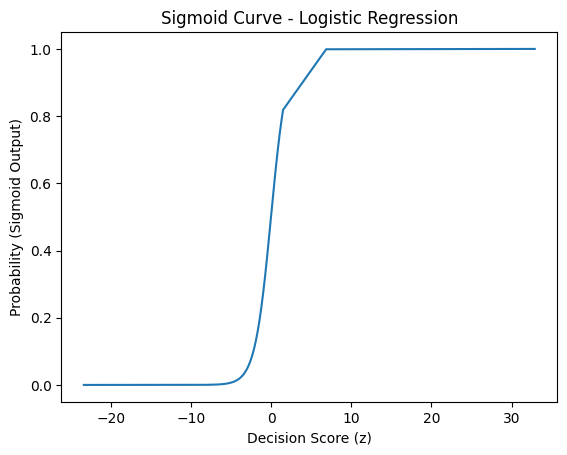

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Get decision scores (before sigmoid)
decision_scores = model.decision_function(X_test)

# Generate sigmoid values
sigmoid_values = 1 / (1 + np.exp(-decision_scores))

# Sort for smooth curve
sorted_scores = np.sort(decision_scores)
sorted_sigmoid = 1 / (1 + np.exp(-sorted_scores))

plt.figure()
plt.plot(sorted_scores, sorted_sigmoid)
plt.xlabel("Decision Score (z)")
plt.ylabel("Probability (Sigmoid Output)")
plt.title("Sigmoid Curve - Logistic Regression")
plt.show()

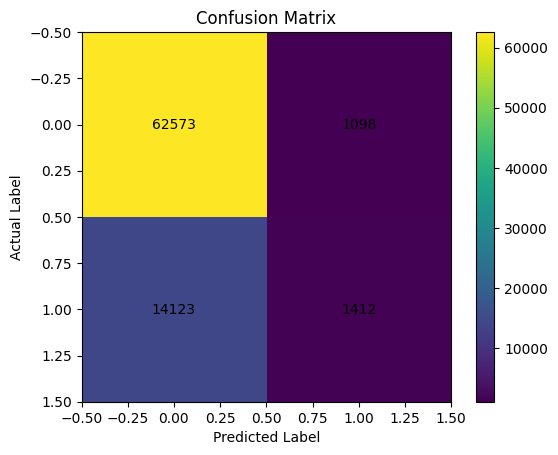

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     63671
           1       0.56      0.09      0.16     15535

    accuracy                           0.81     79206
   macro avg       0.69      0.54      0.52     79206
weighted avg       0.77      0.81      0.75     79206

ROC-AUC: 0.720378839166259


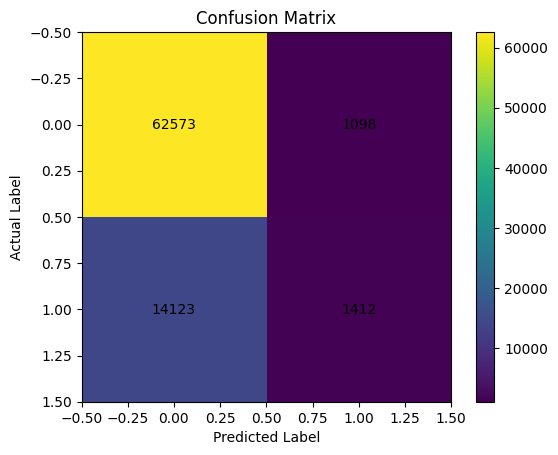

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


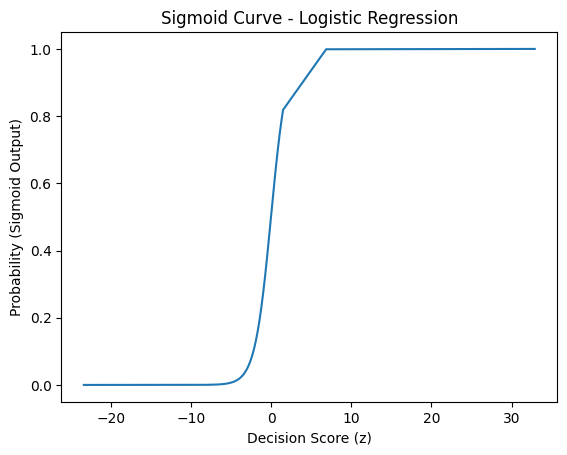

In [25]:
# =========================
# 1. IMPORT LIBRARIES
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


# =========================
# 2. LOAD DATA
# =========================
path = "/root/.cache/kagglehub/datasets/gabrielsantello/lending-club-loan-preprocessed-dataset/versions/1"
df = pd.read_csv(path + "/lending_club_loan_two.csv")


# =========================
# 3. CREATE TARGET VARIABLE
# =========================
df["target"] = df["loan_status"].map({
    "Fully Paid": 0,
    "Charged Off": 1
})

df.drop("loan_status", axis=1, inplace=True)


# =========================
# 4. DROP HIGH-CARDINALITY COLUMNS
# =========================
df.drop(["emp_title", "address"], axis=1, inplace=True)


# =========================
# 5. SPLIT FEATURES & TARGET
# =========================
X = df.drop("target", axis=1)
y = df["target"]


# =========================
# 6. TRAIN–TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# =========================
# 7. IDENTIFY COLUMN TYPES
# =========================
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns


# =========================
# 8. PREPROCESSING PIPELINES
# =========================
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


# =========================
# 9. LOGISTIC REGRESSION PIPELINE
# =========================
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])


# =========================
# 10. TRAIN MODEL
# =========================
model.fit(X_train, y_train)


# =========================
# 11. PREDICTIONS
# =========================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


# =========================
# 12. EVALUATION METRICS
# =========================
print("CLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_prob))


# =========================
# 13. CONFUSION MATRIX
# =========================
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


# =========================
# 14. SIGMOID CURVE
# =========================
decision_scores = model.decision_function(X_test)

sorted_scores = np.sort(decision_scores)
sigmoid_values = 1 / (1 + np.exp(-sorted_scores))

plt.figure()
plt.plot(sorted_scores, sigmoid_values)
plt.xlabel("Decision Score (z)")
plt.ylabel("Probability (Sigmoid Output)")
plt.title("Sigmoid Curve - Logistic Regression")
plt.show()